# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Importing the training set

In [36]:
detaset_train = pd.read_csv("Google_Stock_Price_Train.csv")
train_set = detaset_train.iloc[:, 1:2].values # 구글 주가의 시초가 열만을 선택하여 numpy배열로 변환

### Feature Scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
train_scaled_set = sc.fit_transform(train_set)

### Creating a data structure with 60 timesteps and 1 output

In [38]:
## t번째 주가와 그 전에 60번의 주가를 따로 저장하여 정렬
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(train_scaled_set[i-60:i, 0]) # list에 추가해주기 위해 [,0]을 삽입한다
    y_train.append(train_scaled_set[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [39]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # 1차원은 배치사이즈, 2차원은 timestep, 3차원은 지표

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [41]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [42]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1], 1))) # 다음 LSTM으로 Sequence를 전달
regressor.add(Dropout(0.2)) #과적합을 피하기 위해 몇몇의 뉴런 네크워크를 누락

### Adding a second LSTM layer and some Dropout regularisation

In [43]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2)) 

### Adding a third LSTM layer and some Dropout regularisation

In [44]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2)) 

### Adding a fourth LSTM layer and some Dropout regularisation

In [45]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2)) 

### Adding the output layer

In [46]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [47]:
regressor.compile(optimizer="adam", loss="mean_squared_error")

### Fitting the RNN to the Training set

In [48]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 9s 77ms/step - loss: 0.0461
Epoch 2/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0067
Epoch 3/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0041
Epoch 9/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0040
Epoch 10/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0047
Epoch 13/100
38/38 [=====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [53]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [55]:
dataset_total = pd.concat((detaset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [56]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0]) # list에 추가해주기 위해 [,0]을 삽입한다
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price = regressor.predict(X_test)
predicted_price = sc.inverse_transform(predicted_price) # 값을 Transform하기 전의 값으로 돌려줘야 한다


1/1 [==============================] - 2s 2s/step


In [57]:
predicted_price

array([[784.75726],
       [782.1246 ],
       [782.02   ],
       [783.15356],
       [786.3124 ],
       [792.09393],
       [797.808  ],
       [800.7229 ],
       [801.5602 ],
       [801.3573 ],
       [800.7986 ],
       [800.1108 ],
       [799.54626],
       [799.7607 ],
       [800.57794],
       [804.8801 ],
       [811.7009 ],
       [819.405  ],
       [824.2423 ],
       [821.3771 ]], dtype=float32)

### Visualising the results

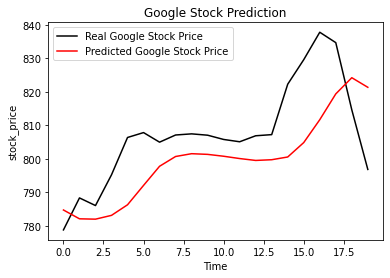

In [71]:
plt.plot(real_stock_price, color = 'black', label="Real Google Stock Price")
plt.plot(predicted_price, color= "red", label="Predicted Google Stock Price")
plt.title('Google Stock Prediction')
plt.xlabel('Time')
plt.ylabel('stock_price')
plt.legend()
plt.show()

#### 결론적으로 비선형적인 변화에는 대응할 수 없었지만 선형적인 변화(추세선)에 대해서는 잘 반응한다는 것을 볼 수 있다